<center><h1><strong>Customer Churn EDA</strong></h1></center>

Importing neccessary library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading data

In [2]:
df = pd.read_csv("Customer_churn_dataset.csv")

In [4]:
df.head(10)

,Customer_ID,Age,Gender,Annual_Income,Spending_Score,City,Purchase_Count,Avg_Order_Value,Membership,Churn
0,1001,56.0,Female,762956.0,16,Chennai,11,2854.54,Platinum,0
1,1002,46.0,Male,788873.0,8,Bangalore,9,3231.06,Platinum,0
2,1003,32.0,Male,215953.0,4,Pune,12,11097.03,Silver,0
3,1004,60.0,Male,650328.0,4,Pune,10,2764.38,Gold,1
4,1005,25.0,Female,153267.0,56,Pune,17,3901.14,Gold,0
5,1006,38.0,Male,232745.0,25,Bangalore,14,14468.53,Gold,0
6,1007,56.0,Other,974945.0,67,Bangalore,19,4201.94,Silver,0
7,1008,36.0,Male,307164.0,96,Chennai,11,10093.67,Gold,1
8,1009,40.0,Female,685626.0,67,Mumbai,6,14690.15,Silver,0
9,1010,NaN,Female,281484.0,27,Chennai,13,5927.30,Gold,1


Check the null values

In [5]:
df.isnull().sum()

Customer_ID         0
Age                11
Gender              0
Annual_Income      11
Spending_Score      0
City               11
Purchase_Count      0
Avg_Order_Value    11
Membership          0
Churn               0
dtype: int64

% of missing values in columns

In [ ]:
(df.isnull().mean() * 100).round(2)

Customer_ID        0.0
Age                5.0
Gender             0.0
Annual_Income      5.0
Spending_Score     0.0
City               5.0
Purchase_Count     0.0
Avg_Order_Value    5.0
Membership         0.0
Churn              0.0
dtype: float64

Handling missing value

In [36]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Annual_Income'].fillna(df['Annual_Income'].median(), inplace=True)
df['Avg_Order_Value'].fillna(df['Avg_Order_Value'].median(), inplace=True)
df['City'].fillna(df['City'].mode()[0], inplace=True)


Statistical Summary

In [37]:
df.describe().T # T is used to transform the dataframe

,count,mean,std,min,25%,50%,75%,max
Customer_ID,220.0,1110.500000,63.652704,1001.00,1055.75,1110.50,1165.25,1220.00
Age,220.0,41.631818,13.372291,18.00,31.00,43.00,53.00,64.00
Annual_Income,220.0,663675.118182,285798.768903,150404.00,420413.00,681831.00,885099.00,1192892.00
Spending_Score,220.0,47.386364,29.970165,1.00,21.00,47.50,72.25,100.00
Purchase_Count,220.0,12.227273,3.397982,5.00,10.00,12.00,14.25,24.00
Avg_Order_Value,220.0,7871.000364,3891.706002,517.93,4725.08,8084.73,11101.12,14934.47
Churn,220.0,0.163636,0.370789,0.00,0.00,0.00,0.00,1.00


Categorical Summary

In [38]:
df.describe(include='object')

,Gender,City,Membership
count,220,220,220
unique,3,6,3
top,Male,Chennai,Silver
freq,105,50,115


Target variable(churn) distribution

In [39]:
df["Churn"].value_counts()

Churn
0    184
1     36
Name: count, dtype: int64

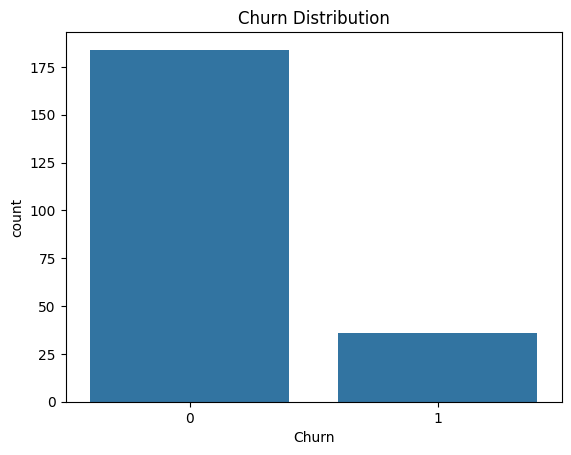

In [40]:
sns.countplot(x='Churn',data=df)
plt.title("Churn Distribution")
plt.show()

<h3>Univariate analysis (Numerical)</h3>

Age Distribution

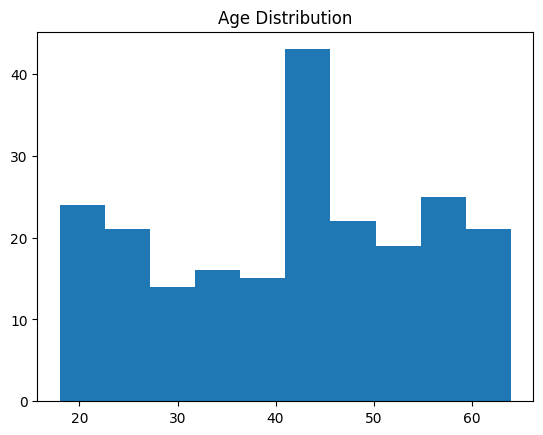

In [41]:
plt.hist(df["Age"])
plt.title("Age Distribution")
plt.show()

Annual Income

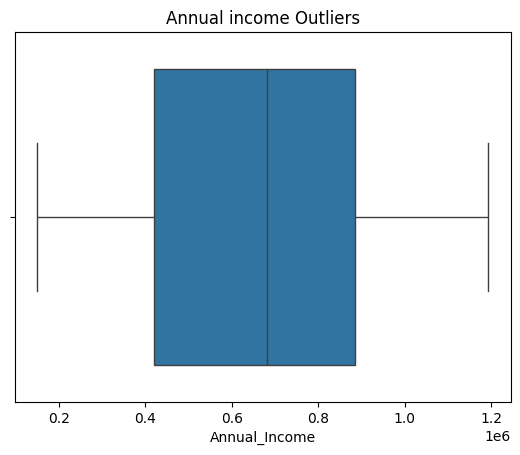

In [42]:
sns.boxplot(x =df["Annual_Income"])
plt.title("Annual income Outliers")
plt.show()

Spending Score

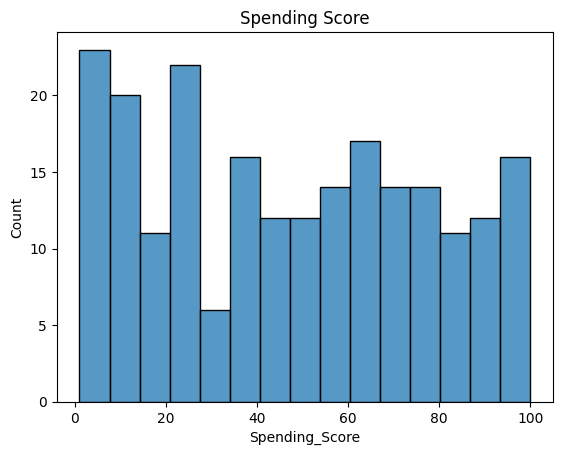

In [43]:
sns.histplot(df["Spending_Score"],bins=15)
plt.title("Spending Score")
plt.show()

<h3>Univariate Analysis(categorical data)</h3>

Gender

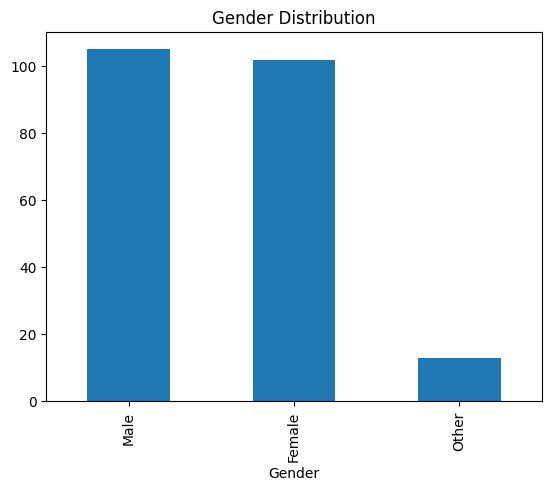

In [44]:
df["Gender"].value_counts().plot(kind='bar')
plt.title("Gender Distribution")
plt.show()

Member Ship records

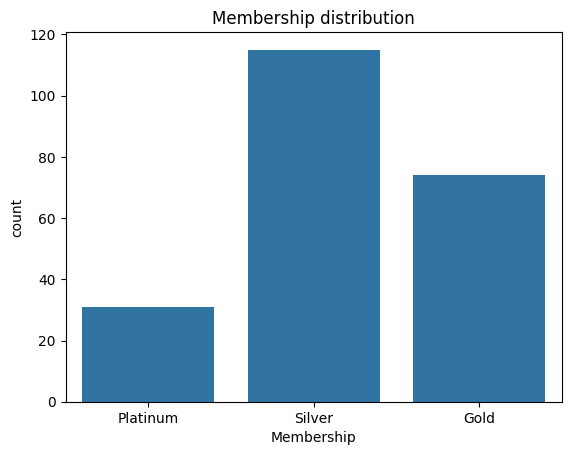

In [45]:
sns.countplot(x="Membership",data=df)
plt.title("Membership distribution")
plt.show()

City Distribution

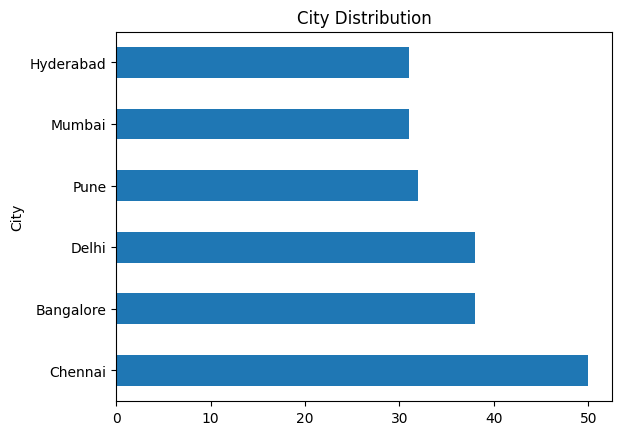

In [46]:
df['City'].value_counts().plot(kind='barh')
plt.title("City Distribution")
plt.show()


<h3>Bivariate analysis with target(churn)</h3>

Churn Vs Gender

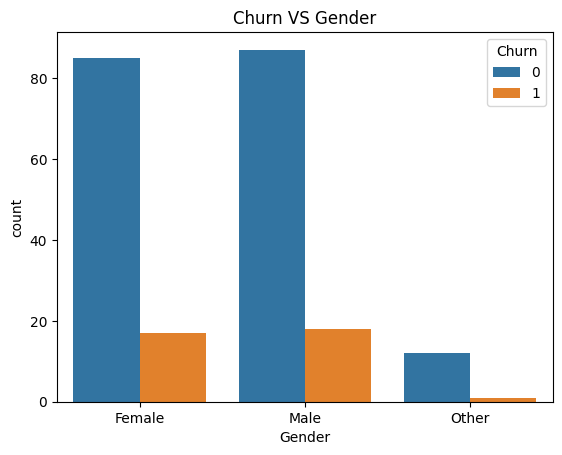

In [47]:
sns.countplot(x='Gender',hue='Churn',data=df)
plt.title("Churn VS Gender")
plt.show()

Chrun VS Membership

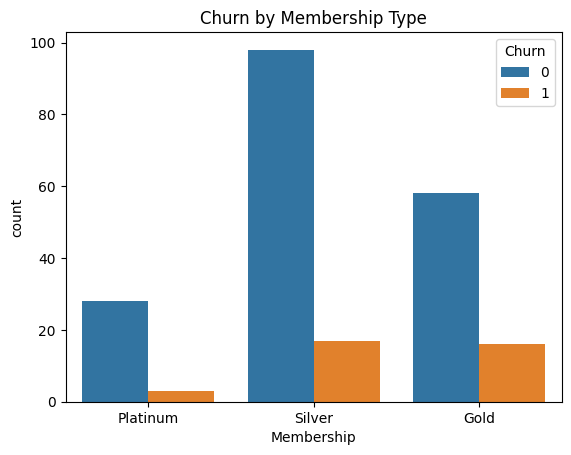

In [48]:
sns.countplot(x='Membership', hue='Churn', data=df)
plt.title("Churn by Membership Type")
plt.show()


Churn VS City

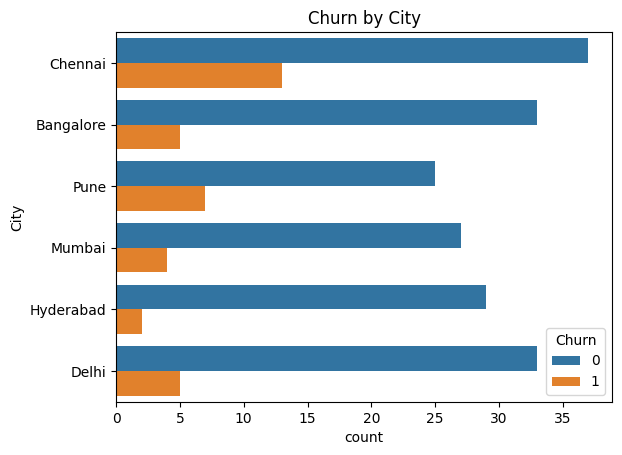

In [49]:
sns.countplot(y='City', hue='Churn', data=df)
plt.title("Churn by City")
plt.show()


<h3>Numerical VS Chrun</h3>

Age Vs Churn

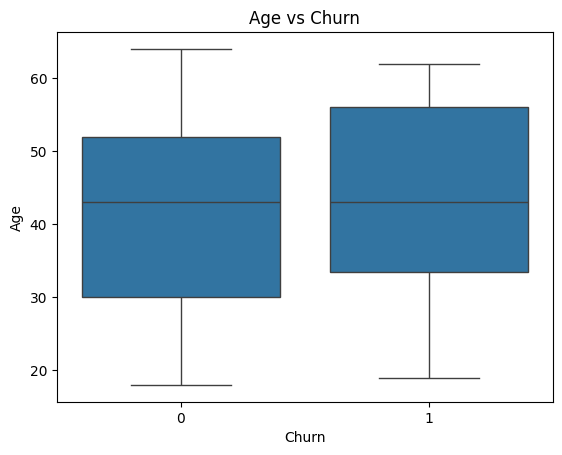

In [50]:
sns.boxplot(x='Churn', y='Age', data=df)
plt.title("Age vs Churn")
plt.show()


Income Vs Churn

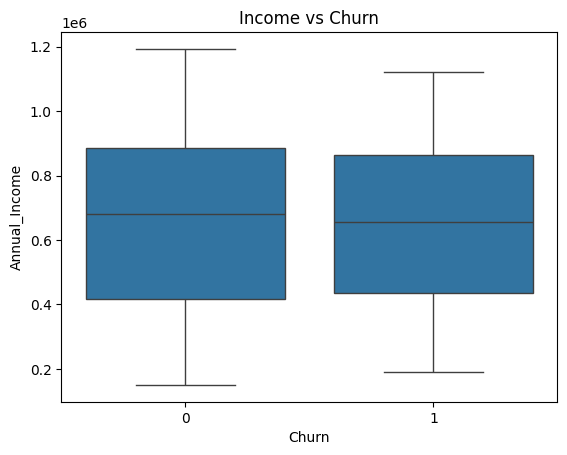

In [51]:
sns.boxplot(x='Churn', y='Annual_Income', data=df)
plt.title("Income vs Churn")
plt.show()


Avg Order vs Churn

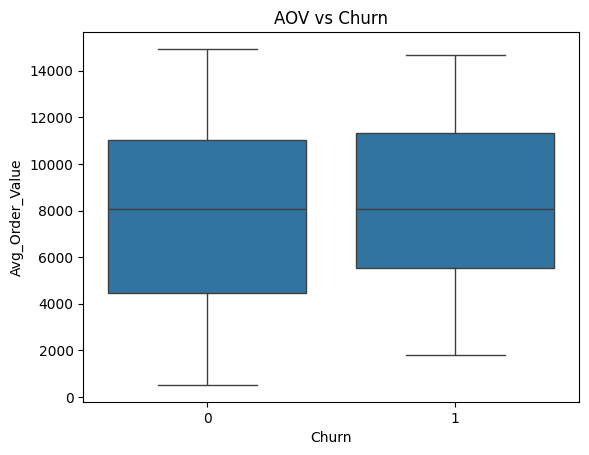

In [52]:
sns.boxplot(x='Churn', y='Avg_Order_Value', data=df)
plt.title("AOV vs Churn")
plt.show()


<h3>Corelation analysis</h3>

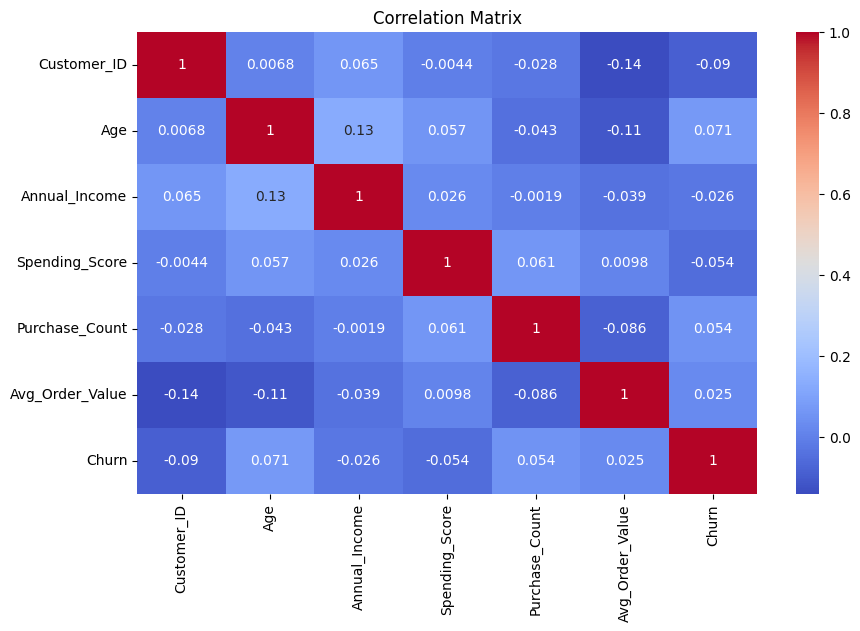

In [53]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


Customer Behaviour analysis

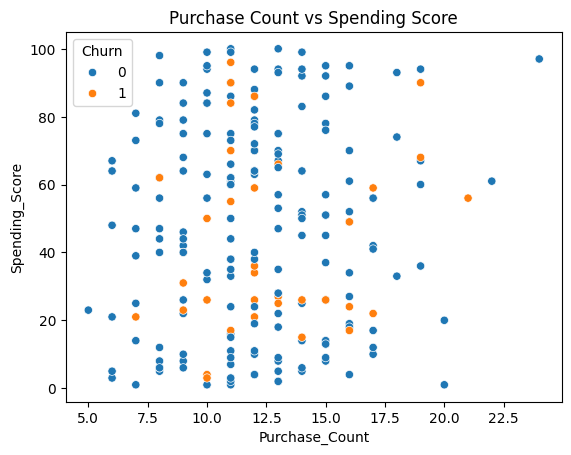

In [54]:
sns.scatterplot(x='Purchase_Count', y='Spending_Score', hue='Churn', data=df)
plt.title("Purchase Count vs Spending Score")
plt.show()


<h3>Grouped Aggregation</h3>

Avg metrices

In [55]:
df.groupby('Churn').mean(numeric_only=True)


,Customer_ID,Age,Annual_Income,Spending_Score,Purchase_Count,Avg_Order_Value
Churn,,,,,,
0,1113.027174,41.211957,666949.336957,48.103261,12.146739,7827.730489
1,1097.583333,43.777778,646940.222222,43.722222,12.638889,8092.157500


Membership by churn rate

In [57]:
df.groupby('Membership')['Churn'].mean().sort_values(ascending=False)


Membership
Gold        0.216216
Silver      0.147826
Platinum    0.096774
Name: Churn, dtype: float64

City by churn rate

In [58]:
df.groupby('City')['Churn'].mean().sort_values(ascending=False)


City
Chennai      0.260000
Pune         0.218750
Bangalore    0.131579
Delhi        0.131579
Mumbai       0.129032
Hyderabad    0.064516
Name: Churn, dtype: float64